# N-grams analysis

In [11]:
import chess
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from typing import List, Tuple
import seaborn as sns
sns.set_theme()
from nlpChess.utils.DatasetLoader import loadConcatenatedDataset, loadConcatenatedShakespeareDataset

Load and preprocess the dataset

In [4]:
ds = loadConcatenatedDataset()
df = ds.to_pandas()


def removeFifthChar(string):
    if len(string) < 5:
        return string
    return string[:4]

#Apply the function to the 'moves' column
df['moves'] = df['Moves'].apply(removeFifthChar)
df.head()

,Moves,Termination,Result,pieces,captures,checks,next_moves,termination_seqs,result_seqs,__index_level_0__,moves
0,"[e2e4, g7g6, g1f3, f8g7, d2d4, d7d6, f1d3, e7e...",CHECKMATE,1-0,"[p, p, n, b, p, p, b, p, b, n, p, p, n, p, b, ...","[, , , , , , , , , , p, p, , , , , , , , , p, ...","[False, False, False, False, False, False, Fal...","[g7g6, g1f3, f8g7, d2d4, d7d6, f1d3, e7e5, c1g...","[CHECKMATE, CHECKMATE, CHECKMATE, CHECKMATE, C...","[1-0, 1-0, 1-0, 1-0, 1-0, 1-0, 1-0, 1-0, 1-0, ...",75721,"[e2e4, g7g6, g1f3, f8g7]"
1,"[e2e4, c7c6, d2d3, d7d6, g2g3, g8f6, h2h4, e7e...",CHECKMATE,0-1,"[p, p, p, p, p, n, p, p, b, p, n, p, n, p, n, ...","[, , , , , , , , , , , , , , , , , , , , , , ,...","[False, False, False, False, False, False, Fal...","[c7c6, d2d3, d7d6, g2g3, g8f6, h2h4, e7e5, f1g...","[CHECKMATE, CHECKMATE, CHECKMATE, CHECKMATE, C...","[0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, ...",80184,"[e2e4, c7c6, d2d3, d7d6]"
2,"[e2e4, c7c5, g1f3, d7d6, d2d4, c5d4, f3d4, g8f...",INSUFFICIENT_MATERIAL,1/2-1/2,"[p, p, n, p, p, p, n, n, n, p, b, p, p, q, p, ...","[, , , , , p, p, , , , , , , , , , , , , , , q...","[False, False, False, False, False, False, Fal...","[c7c5, g1f3, d7d6, d2d4, c5d4, f3d4, g8f6, b1c...","[INSUFFICIENT_MATERIAL, INSUFFICIENT_MATERIAL,...","[1/2-1/2, 1/2-1/2, 1/2-1/2, 1/2-1/2, 1/2-1/2, ...",19864,"[e2e4, c7c5, g1f3, d7d6]"
3,"[d2d4, d7d6, g1f3, g8f6, c2c4, g7g6, e2e3, f8g...",CHECKMATE,0-1,"[p, p, n, n, p, p, p, b, n, p, b, k, p, p, p, ...","[, , , , , , , , , , , , , , p, p, q, q, p, , ...","[False, False, False, False, False, False, Fal...","[d7d6, g1f3, g8f6, c2c4, g7g6, e2e3, f8g7, b1c...","[CHECKMATE, CHECKMATE, CHECKMATE, CHECKMATE, C...","[0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, ...",76699,"[d2d4, d7d6, g1f3, g8f6]"
4,"[e2e4, g7g6, d2d4, d7d5, e4e5, c7c5, d4c5, f8g...",CHECKMATE,0-1,"[p, p, p, p, p, p, p, b, b, p, n, n, b, b, q, ...","[, , , , , , p, , , , , , , , , n, b, p, p, , ...","[False, False, False, False, False, False, Fal...","[g7g6, d2d4, d7d5, e4e5, c7c5, d4c5, f8g7, c1f...","[CHECKMATE, CHECKMATE, CHECKMATE, CHECKMATE, C...","[0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, ...",92991,"[e2e4, g7g6, d2d4, d7d5]"


In [6]:
moves = np.concatenate(df['moves'].values)
moves

array(['e2e4', 'g7g6', 'g1f3', ..., 'g8f6', 'c2c4', 'g7g6'], dtype=object)

In [12]:
dsShakespeare = loadConcatenatedShakespeareDataset()
dfShakespeare = dsShakespeare.to_pandas()
dfShakespeare.head()

,Unnamed: 0,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,19217,19218,Antony and Cleopatra,9.0,2.1.33,POMPEY,"How now, Varrius!"
1,99413,99414,Troilus and Cressida,32.0,1.2.66,CRESSIDA,"Ay, if I ever saw him before and knew him."
2,104667,104668,Twelfth Night,86.0,3.4.193,VIOLA,With the same 'havior that your passion bears
3,41989,41990,Henry VIII,41.0,3.2.121,SUFFOLK,"May be, he hears the king"
4,36553,36554,Hamlet,119.0,5.2.312,HAMLET,"Nay, come, again."


In [ ]:
lines = dfShakespeare['PlayerLine'].tolist()
lines = ' '.join(lines)
lines[:500]

"How now, Varrius! Ay, if I ever saw him before and knew him. With the same 'havior that your passion bears May be, he hears the king Nay, come, again. Nor in a way so chaste, since my desires My lord, Fie on sinful fantasy! I warrant thee. Of ill-shaped fishes, and about his shelves Prithee, do, Jack. So bad an instrument: his name's Parolles. Your franchises, whereon you stood, confined The rest is labour, which is not used for you: Hot, hot, and moist: this hand of yours requires Why might not"

In [18]:
lines = lines.lower()
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def removeStopwords(text: str) -> str:
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

import string
def removePunctuation(text: str) -> str:
    return text.translate(str.maketrans('', '', string.punctuation))

lines = removeStopwords(lines)
lines = removePunctuation(lines)
lines = lines.split()
lines[:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Paolo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['varrius',
 'ay',
 'ever',
 'saw',
 'knew',
 'havior',
 'passion',
 'bears',
 'may',
 'hears']

In [44]:
def most_common_ngrams(moves: List[str], n: int, top_k: int = 10) -> List[Tuple[Tuple[str], int]]:
    ngrams = (tuple(moves[i:i+n]) for i in range(len(moves) - n + 1))
    counter = Counter(ngrams)
    return counter.most_common(top_k), len(moves) - n + 1


In [34]:
top_ngrams_shakespear, _ = most_common_ngrams(lines, 3, 10)

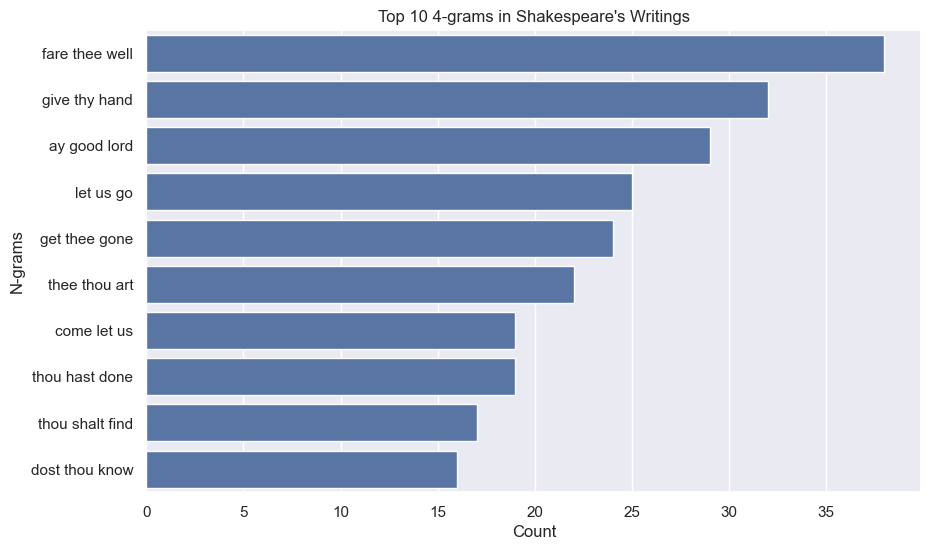

In [24]:
# plot the top 10 ngrams
def plot_top_ngrams(ngrams: List[Tuple[Tuple[str], int]], title: str):
    ngram_labels = [' '.join(ngram) for ngram, _ in ngrams]
    counts = [count for _, count in ngrams]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts, y=ngram_labels)
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('N-grams')
    plt.show()
plot_top_ngrams(top_ngrams_shakespear, "Top 10 4-grams in Shakespeare's Writings")

Count WAAAAAAY less than chess moves

Let's try producing the top 5 5-grams

In [35]:
top_ngrams, _ = most_common_ngrams(moves, n=4, top_k=5)
print(top_ngrams)

[(('d2d4', 'g8f6', 'c2c4', 'e7e6'), 6771), (('e2e4', 'e7e5', 'g1f3', 'b8c6'), 6652), (('e2e4', 'c7c5', 'g1f3', 'd7d6'), 5879), (('e2e4', 'c7c5', 'g1f3', 'b8c6'), 5695), (('e2e4', 'e7e6', 'd2d4', 'd7d5'), 5434)]


Define method to plot ngrams

In [27]:
# visualize the n-grams

def plot_ngrams(ngrams: List[Tuple[Tuple[str], int]]) -> None:
    ngram_labels = [' '.join(ngram) for ngram, _ in ngrams]
    counts = [count for _, count in ngrams]

    plt.figure(figsize=(4, 4))
    sns.barplot(x=counts, y=ngram_labels, palette='viridis')
    plt.xlabel('Count')
    plt.ylabel('N-grams')
    plt.title('Top N-grams in Chess Moves')
    plt.show()


Define method to plot the dataframe of ngrams

In [28]:
# plot the ngrams df for every n (every n as a subplot)

def plot_ngrams_df(ngrams_df: pd.DataFrame) -> None:

    unique_n = ngrams_df['N'].unique()
    num_plots = len(unique_n)
    fig, axes = plt.subplots(num_plots, 1, figsize=(6, 6 * num_plots))

    for i, n in enumerate(unique_n):
        ax = axes[i] if num_plots > 1 else axes
        subset = ngrams_df[ngrams_df['N'] == n]
        sns.barplot(x='Count', y='N-gram', data=subset, ax=ax, palette='viridis')
        ax.set_title(f'Top {n}-grams in Chess Moves')
        ax.set_xlabel('Count')
        ax.set_ylabel('N-grams')

    plt.show()

Plot top 5 5-grams

C:\Users\Paolo\AppData\Local\Temp\ipykernel_16952\4254485275.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngram_labels, palette='viridis')


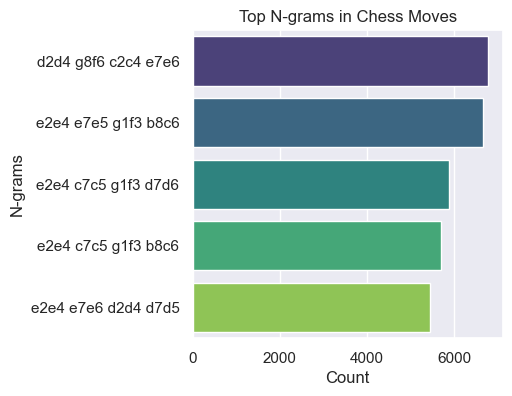

In [29]:
plot_ngrams(top_ngrams)

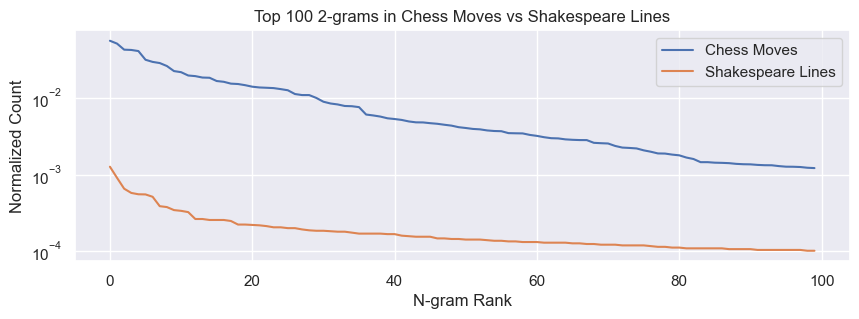

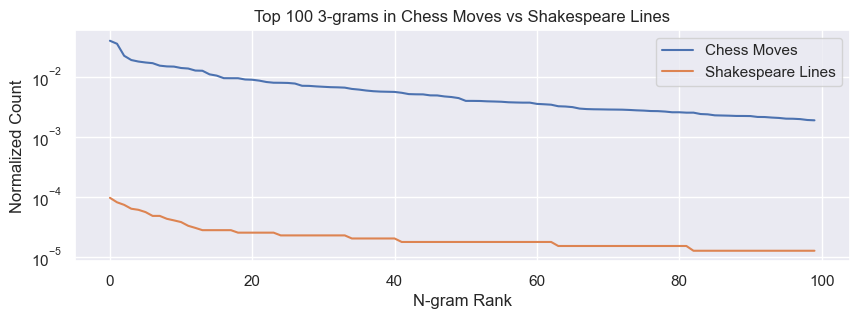

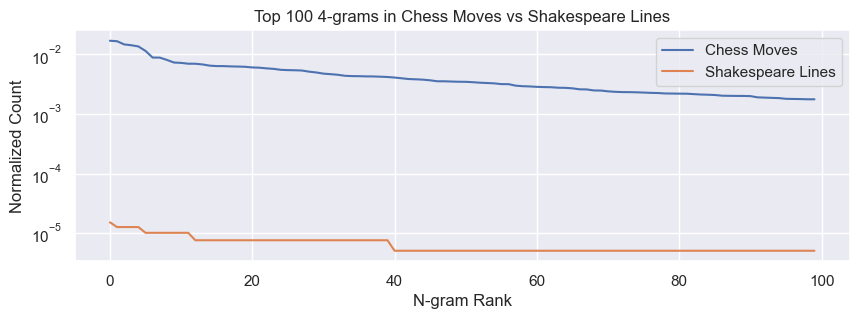

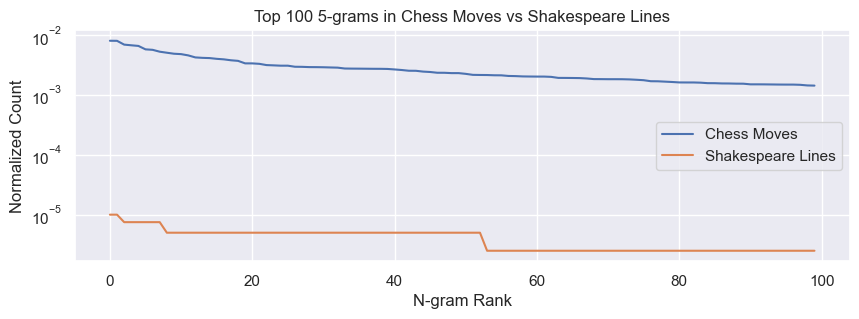

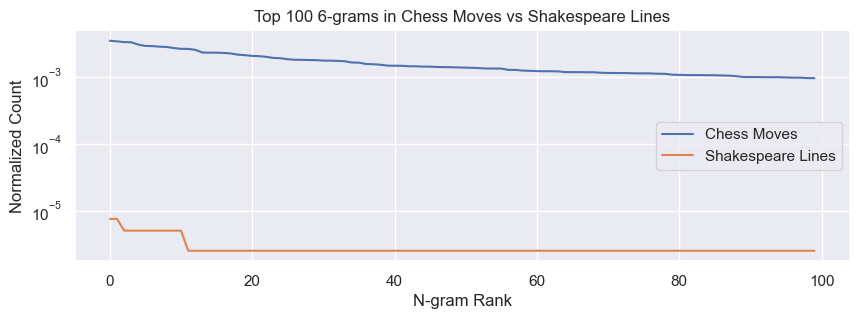

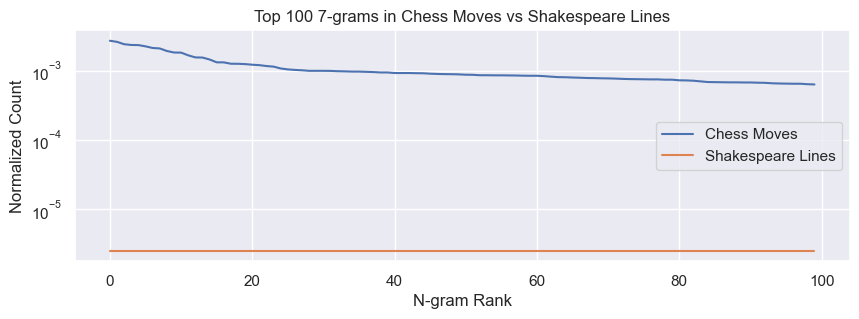

In [51]:
topK = 100

for n in range(2, 8):
    ngramsChess, nNgramsChess = most_common_ngrams(moves, n, topK)
    ngramsShakespear, nNgramsShakespear = most_common_ngrams(lines, n, topK)

    plt.figure(figsize=(10, 3))
    plt.semilogy(range(topK), [count/nNgramsChess for _, count in ngramsChess], label='Chess Moves')
    plt.semilogy(range(topK), [count/nNgramsShakespear for _, count in ngramsShakespear], label='Shakespeare Lines')
    plt.title(f'Top {topK} {n}-grams in Chess Moves vs Shakespeare Lines')
    plt.xlabel('N-gram Rank')
    plt.ylabel('Normalized Count')
    # plt.xticks(range(topK), [f'#{i+1}' for i in range(topK)])
    plt.legend()
    plt.show()

Let's see if some of the famous openings are in the top n-grams (respectively to their lenght)

In [48]:
famous_openings = {
    "Ruy Lopez (Spanish Opening)": ["e2e4", "e7e5", "g1f3", "b8c6", "f1b5"],
    "Italian Game": ["e2e4", "e7e5", "g1f3", "b8c6", "f1c4"],
    "Sicilian Defense": ["e2e4", "c7c5"],
    "Open Sicilian": ["e2e4", "c7c5", "g1f3", "d7d6", "d2d4", "c5d4", "f3d4"],
    "French Defense": ["e2e4", "e7e6"],
    "Caro-Kann Defense": ["e2e4", "c7c6"],
    "Queen's Gambit": ["d2d4", "d7d5", "c2c4"],
    "King's Indian Defense": ["d2d4", "g8f6", "c2c4", "g7g6"],
    "Slav Defense": ["d2d4", "d7d5", "c2c4", "c7c6"],
    "Scandinavian Defense": ["e2e4", "d7d5"],
    "English Opening": ["c2c4"],
    "King's Gambit": ["e2e4", "e7e5", "f2f4"],
    "Nimzo-Indian Defense": ["d2d4", "g8f6", "c2c4", "e7e6", "b1c3", "f8b4"],
}


Let's check if the n-grams represent famous openings

In [73]:
#check if the openings are in the top 5 ngrams
def check_openings_in_ngrams(openings: dict, ngrams:List[Tuple]) -> List[str]:
    openings_list = []
    for opening, moves in openings.items():
        moves_str = ' '.join(moves)
        for i, (ngram, count) in enumerate(ngrams):
            if moves_str in ' '.join(ngram):
                openings_list.append({"Opening": opening, "Moves": moves_str, "Rank":i, "Count": count})
                break
            
    return openings_list

In [86]:
check_openings_in_ngrams(famous_openings, top_ngrams)

[{'Opening': 'Sicilian Defense',
  'Moves': 'e2e4 c7c5',
  'Rank': 2,
  'Count': 5879},
 {'Opening': 'French Defense', 'Moves': 'e2e4 e7e6', 'Rank': 4, 'Count': 5434},
 {'Opening': 'English Opening', 'Moves': 'c2c4', 'Rank': 0, 'Count': 6771}]

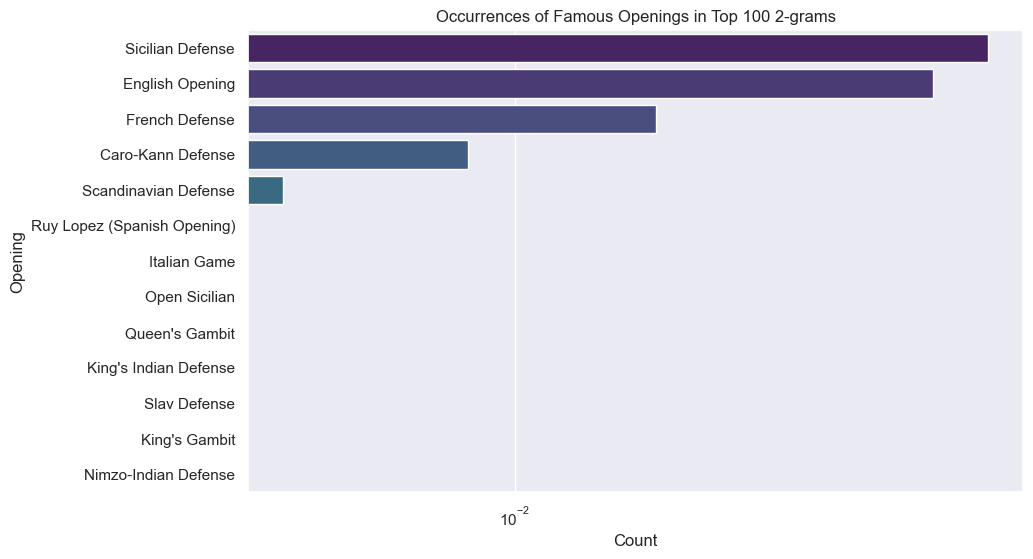

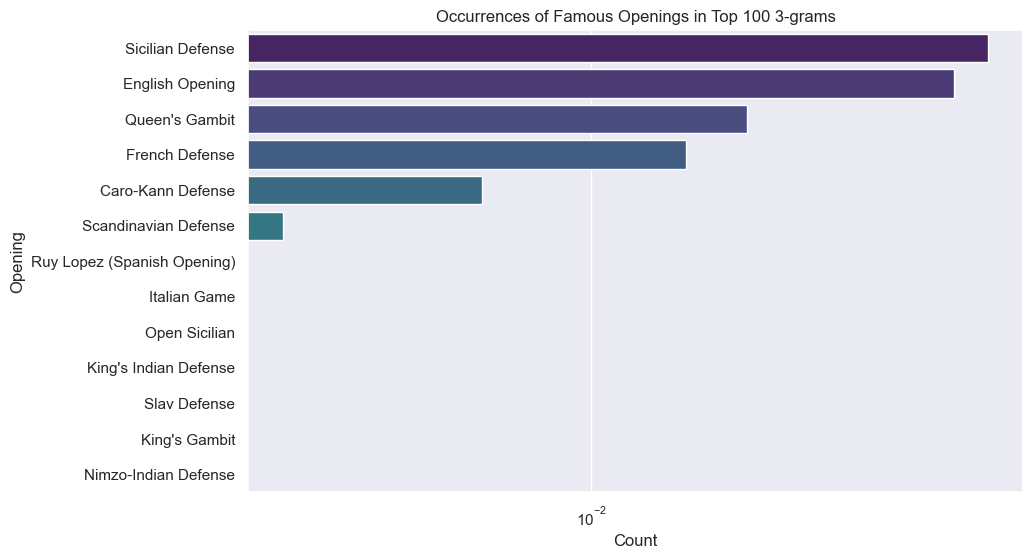

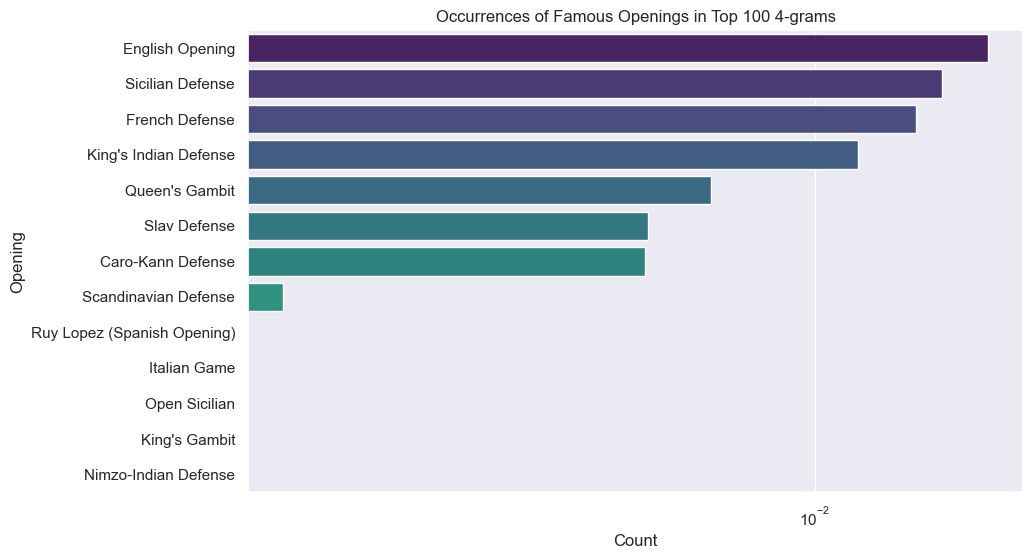

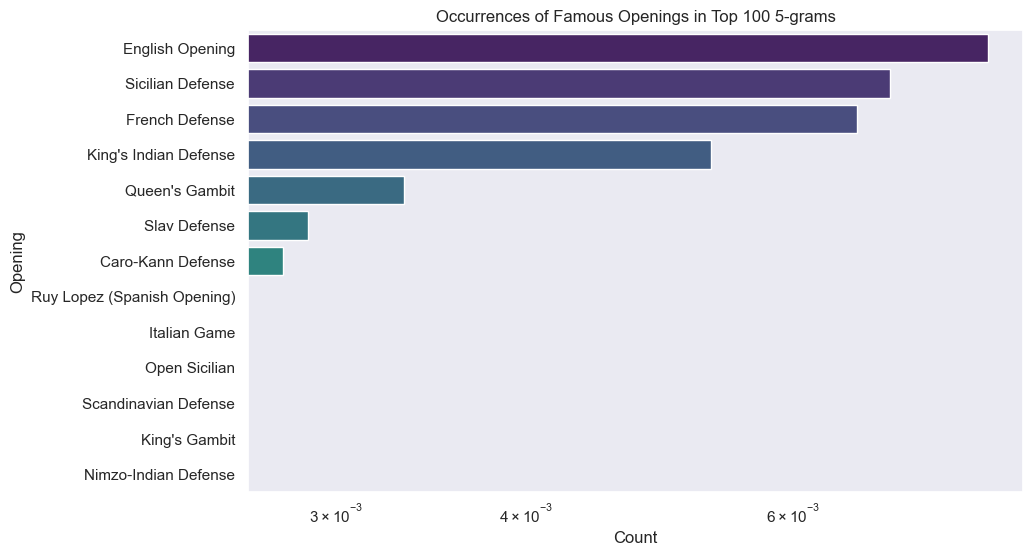

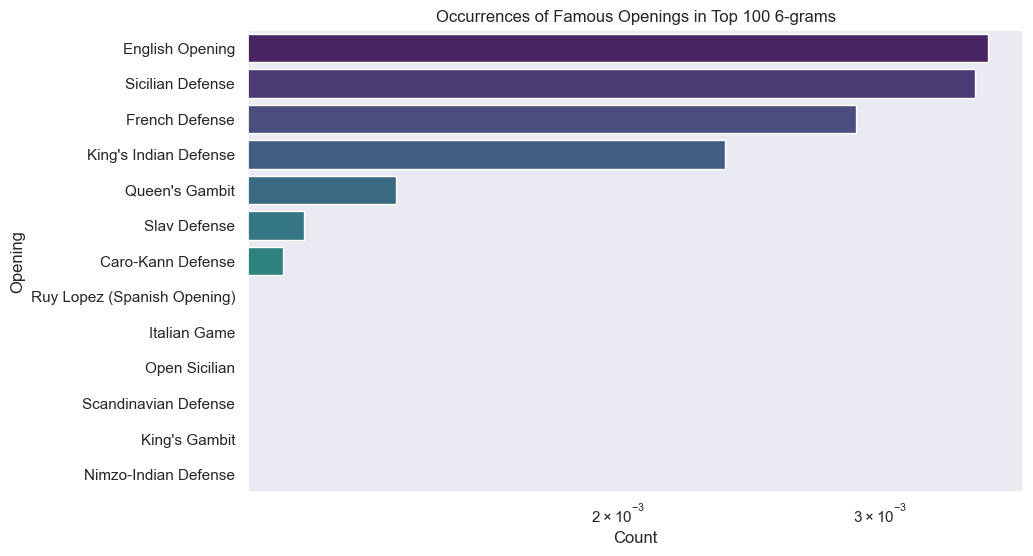

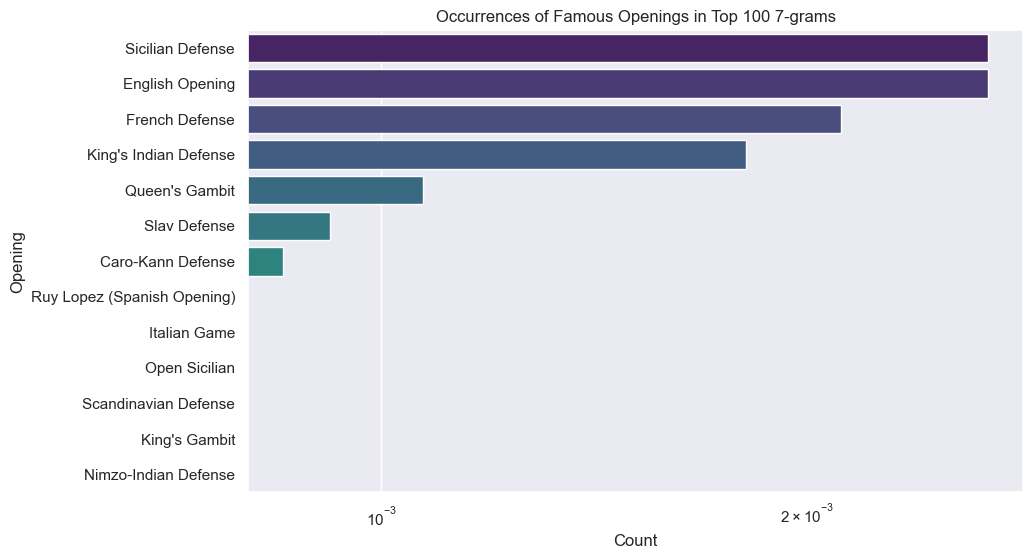

In [88]:
for n in range(2, 8):
    # Plot the openings in ngrams
    ngramsChess, nNgramsChess = most_common_ngrams(moves, n, 100)
    openings_in_ngrams = check_openings_in_ngrams(famous_openings, ngrams=ngramsChess)

    #Compute the total count per opening
    opening_counts = []
    for opening in famous_openings:
        moves_str = ' '.join(famous_openings[opening])
        count = sum(r['Count'] for r in openings_in_ngrams if opening == r['Opening']) / nNgramsChess
        opening_counts.append((opening, count))

    # Convert to DataFrame for plotting
    openings_count_df = pd.DataFrame(opening_counts, columns=['Opening', 'Count']).sort_values('Count', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Count', y='Opening', data=openings_count_df, hue='Opening', palette='viridis', legend=False)
    plt.title(f'Occurrences of Famous Openings in Top 100 {n}-grams')
    plt.xlabel('Count')
    plt.ylabel('Opening')
    plt.xscale('log')
    plt.show()
